In [1]:
import pandas as pd

In [2]:
colnames = ['preg', 'glu', 'bp', 'sft', 'ins', 'bmi', 'dpf', 'age', 'outcome']

In [3]:
df = pd.read_csv("pima-indians-diabetes-1.data",names = colnames)

In [4]:
df.head()

,preg,glu,bp,sft,ins,bmi,dpf,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   preg     768 non-null    int64  
 1   glu      768 non-null    int64  
 2   bp       768 non-null    int64  
 3   sft      768 non-null    int64  
 4   ins      768 non-null    int64  
 5   bmi      768 non-null    float64
 6   dpf      768 non-null    float64
 7   age      768 non-null    int64  
 8   outcome  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
target = "outcome"

In [8]:
df[target].value_counts()

0    500
1    268
Name: outcome, dtype: int64

In [10]:
df.columns

Index(['preg', 'glu', 'bp', 'sft', 'ins', 'bmi', 'dpf', 'age', 'outcome'], dtype='object')

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x = df.loc[:,['preg', 'glu', 'bp', 'sft', 'ins', 'bmi', 'dpf', 'age']]
y = df.loc[:,['outcome']]

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=10)

In [14]:
x_train.shape

(576, 8)

In [15]:
x_test.shape

(192, 8)

In [16]:
y_train.shape

(576, 1)

In [17]:
y_test.shape

(192, 1)

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
import numpy as np

In [25]:
params = {"max_depth":np.arange(1,30)}

In [26]:
params

{'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])}

In [28]:
model = DecisionTreeClassifier()

In [29]:
model

DecisionTreeClassifier()

# GRID SEARCH CV

In [47]:
grid = GridSearchCV(model,params,cv=5,scoring='f1')

In [48]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             scoring='f1')

In [49]:
grid.best_params_

{'max_depth': 7}

In [57]:
model = DecisionTreeClassifier(max_depth=7)

In [58]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7)

In [59]:
pred = model.predict(x_test)

In [60]:
from sklearn import metrics
metrics.f1_score(y_test,pred)

0.5581395348837208

In [61]:
from sklearn import tree

In [73]:
import matplotlib.pyplot as plt


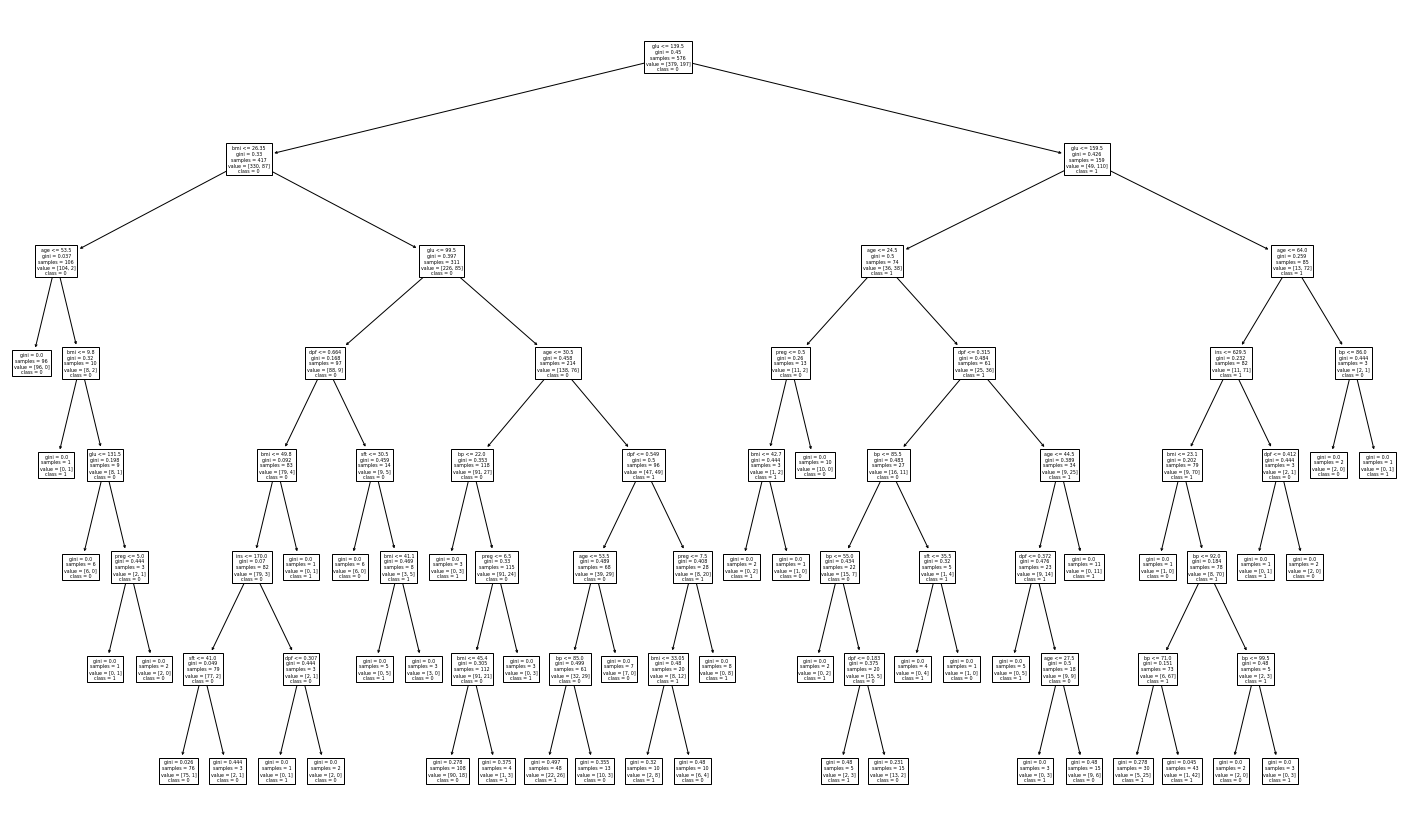

In [87]:
fig = plt.figure(figsize=(25,15))
_ = tree.plot_tree(model,feature_names=list(x), class_names =['0','1'] )
plt.show()

In [94]:
fig.savefig("tree.png")